In [1]:
import pandas as pd
import numpy as np

from src.distance import hamming_distance
from src.distance import jukes_cantor_distance

from sklearn.cluster import AgglomerativeClustering
import seaborn as sns; sns.set_theme()
import matplotlib.pylab as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [47]:
df = pd.read_csv('data/dataset.csv', index_col = 0, low_memory=False)

In [48]:
df['lineage'].value_counts()
dates = df.loc[~df['collection date'].isin(['not provided', np.nan]), 'collection date']
dates = pd.to_datetime(dates)
dates.sort_values()

V2233   2020-10-24
V2241   2020-10-24
V2249   2020-10-24
V2101   2020-10-24
V2102   2020-10-24
           ...    
V3737   2021-08-19
V3738   2021-08-19
V3739   2021-08-19
V3721   2021-08-19
V3741   2021-08-19
Name: collection date, Length: 2894, dtype: datetime64[ns]

In [3]:
lineages = ['B.1.1.7','B.1.617.2','AY.12', 'AY.9']
df = df.loc[df['lineage'].isin(lineages)]

In [4]:
mutations = df.iloc[:, 0:29903]
samples = mutations.index
positions = mutations.columns
X = mutations.to_numpy()
# X = np.transpose(mutations.to_numpy())
print('Samples length', len(samples))
print('Positions length', len(positions))
X.shape
X[X == 1] = 0
X[X == 2] = 1

Samples length 2633
Positions length 29903


In [ ]:
h_distances = hamming_distance.compute_HammingDistance(X)
jukes_cantor = jukes_cantor_distance.hamming_to_jukes_cantor(h_distances, h_distances.shape[0])

In [ ]:
# clustering = AgglomerativeClustering(affinity = 'precomputed', linkage = 'average').fit(h_distances)
# clustering.labels_

In [ ]:
# dist = h_distances
# ax = plt.subplot()
# n = 1000
# ax = sns.heatmap(pd.DataFrame(np.interp(dist[0:n,0:n], (dist[0:n,0:n].min(), dist[0:n,0:n].max()), (0, +1)), index = positions[0:n], columns = positions[0:n]), cmap="YlGnBu")
# plt.savefig("../heatmap_hamming.pdf")


# dist = jukes_cantor
# ax = plt.subplot()
# n = 1000
# ax = sns.heatmap(pd.DataFrame(dist[0:n,0:n], index = positions[0:n], columns = positions[0:n]), cmap="YlGnBu")
# plt.savefig("../heatmap_jukes_cantor.pdf")

In [ ]:
# from sklearn.datasets import load_digits
# from sklearn.manifold import MDS

# embedding = MDS(n_components = 2, dissimilarity = 'precomputed', n_jobs = -1, verbose = 1, max_iter = 300)
# X_transformed = embedding.fit_transform(jukes_cantor)
# X_transformed.shape

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)
X_transformed.shape

In [5]:
import numpy as np
from sklearn.manifold import TSNE

X_transformed = TSNE(n_components=2,\
                  init='random', n_jobs=-1).fit_transform(X)
X_transformed.shape

(2633, 2)

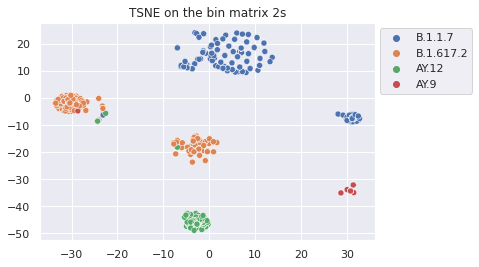

In [6]:
cols = df.loc[:,'lineage'].copy()
# cols.unique()
# cols[pd.isna(cols)] = 'unlabeled'

g = sns.scatterplot(x = X_transformed[:,0], y = X_transformed[:,1], hue = cols)
g.set_title('TSNE on the bin matrix 2s')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig('TSNE-bin2s.pdf', format='pdf', bbox_inches='tight')

In [ ]:
# from mpl_toolkits import mplot3d
# import numpy as np
# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax = plt.axes(projection='3d')

# ax.scatter3D(X_transformed[:,0],X_transformed[:,1], X_transformed[:,2])

In [ ]:
# Embeddings

X = np.load('biovec_test/embeddings10000.npy')
index = pd.read_csv('biovec_test/test_file_name_index.tsv', delimiter="\t", usecols=['accession'])
index = index.accession.tolist()
index = [k.split('_')[1] for k in index]

lineages = ['B.1.1.7','B.1.617.2','AY.12', 'AY.9']
df = df.loc[df['lineage'].isin(lineages)]
selected = df.index

msk = [True if k in selected else False for k in index]
msk_lineage = [index[i] for i, x in enumerate(msk) if x]

cols = df.loc[msk_lineage, ['lineage']].copy()
cols.loc[pd.isna(cols['lineage'])] = 'unlabeled'

# KNN

kmeans = KMeans(n_clusters=len(cols['lineage'].unique()), random_state=0).fit(X[msk])
kmeans.labels_
# kmeans.predict([[0, 0], [12, 3]])
# kmeans.cluster_centers_

# TSNE
X_transformed = TSNE(n_components=2,\
                  init='random', n_jobs=-1).fit_transform(X[msk])
X_transformed.shape

In [ ]:
g = sns.scatterplot(x = X_transformed[:,0], y = X_transformed[:,1], hue = cols['lineage'], style=kmeans.labels_)
g.set_title('TSNE on the embeddings matrix 10000')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig('TSNE-embeddings10000.pdf', format='pdf', bbox_inches='tight')